<a href="https://colab.research.google.com/github/nistaku/TMDL/blob/main/TMDL_2024_25_Assignment_3%2C_Qs_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [ ]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Q.1.1
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Course/Bechelor1/Block4/TMDL/tmdb_5000_movies.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

View information about the dataset including datatypes and null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

*Your text answer here*

### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [ ]:
df = df[["title", "overview", "genres"]]
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [ ]:
df = df.dropna(subset=["overview"])
df = df.reset_index(drop=True)

# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [ ]:
import numpy as np
from tqdm import tqdm

np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs)  # choose random entry
    return genre

def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))  # create a vector of zeros with length of unique_labels
    if label in unique_labels:
        out[unique_labels.index(label)] = 1  # set the corresponding position to 1
    return out

# Assuming df is a DataFrame with a 'genres' column
processed_genres = []
for index, row in df.iterrows():
    processed_genres.append(process_genre_string(row['genres']))

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add processed genres as a new column
df["proc_genres"] = processed_genres

# one-hot encode genres
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    encoded_labels.append(encode_labels(row["proc_genres"], unique_genres))

df["one_hot_genres"] = encoded_labels

100%|██████████| 4800/4800 [00:00<00:00, 12903.32it/s]


Verify that one-hot encodings are indeed as expected

In [ ]:
df["one_hot_genres"][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

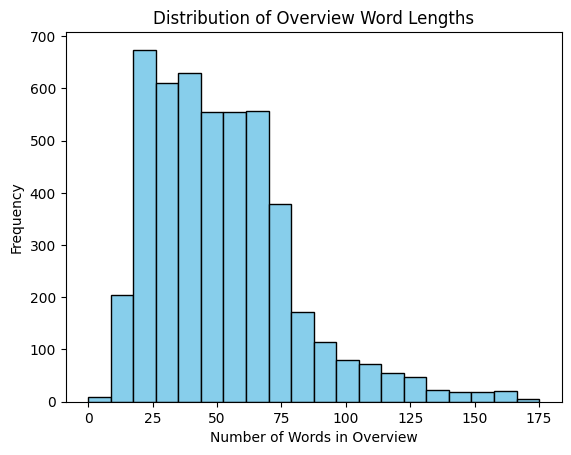

In [ ]:
import re
import matplotlib.pyplot as plt

def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# Loop over df, remove punctuation, make words lowercase and add it to a new column
for index, row in df.iterrows():
    overview = row['overview']
    cleaned_overview = remove_punctuation(overview.lower())  # Remove punctuation and make lowercase
    processed_overviews.append(cleaned_overview)

df["proc_overview"] = processed_overviews

# Get the word lengths of each overview and store it in a list
overview_lens = [len(overview.split()) for overview in processed_overviews]

# For the sake of simplicity, add these values as a column to the df
df["overview_len"] = overview_lens

# Plot histogram of the word lengths
plt.hist(overview_lens, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Words in Overview')
plt.ylabel('Frequency')
plt.title('Distribution of Overview Word Lengths')
plt.show()

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

In [ ]:
# Find the shortest and longest overviews in terms of word count
shortest_overview = df.loc[df['overview_len'].idxmin()]
longest_overview = df.loc[df['overview_len'].idxmax()]

shortest_overview_len = shortest_overview['overview_len']
longest_overview_len = longest_overview['overview_len']

print(f"Shortest Overview Length: {shortest_overview_len} words")
print(f"Longest Overview Length: {longest_overview_len} words")
print(f"Shortest Overview: {shortest_overview['overview']}")
print(f"Longest Overview: {longest_overview['overview']}")

Shortest Overview Length: 0 words
Longest Overview Length: 175 words
Shortest Overview:  
Longest Overview: An orphaned girl, driven by poverty at such a young age, makes a promise with an enchantress. In return for beauty and the admiration of every man, she will never be with the man she loves. This spell cannot be broken unless the impossible happens: snow falling in spring and the dead coming back to life. Now a grown and beautiful princess, she regrets her promise, for all of the men she's loved has always been met with tragedy. In love again with a man behind a red armor and a golden mask who rescues her from death, she is tormented by their inevitable parting. Meanwhile, Kunlun, the slave of a great general, is searching for the lost memories of a family he once had. Soon the fate of these two intertwine when the princess believes the general to be her hero, thus pulling him into this web of fate. What end will befallen our three characters? Are their fates already sealed by a h

*Your text answer here*

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [ ]:
token_len = 15  # number of words

# Only select rows where overview length is more than or equal to token_len
df = df[df['overview_len'] >= token_len]

# Split each proc_overview into a list of words, select the first token_len words,
# and add the list of words back into df["proc_overview"]
df["proc_overview"] = df["proc_overview"].apply(lambda x: ' '.join(x.split()[:token_len]))

# Print to verify
print(df[['overview', 'proc_overview']].head())

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                       proc_overview  
0  in the 22nd century a paraplegic marine is dis...  
1  captain barbossa long believed to be dead has ...  
2  a cryptic message from bonds past sends him on...  
3  following the death of district attorney harve...  
4  john carter is a warweary former military capt...  


<ipython-input-15-a12ed4836a65>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["proc_overview"] = df["proc_overview"].apply(lambda x: ' '.join(x.split()[:token_len]))


### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [ ]:
# Store all words for all movies in a set (sets automatically remove duplicates)
all_words = set()

# Loop through each processed overview, split into words and add to the set
for overview in df['proc_overview']:
    all_words.update(overview.split())

# Convert the set to a sorted list
sorted_vocab = sorted(list(all_words))

# Get the length of the vocabulary
vocab_len = len(sorted_vocab)
print(f"Vocabulary length: {vocab_len}")

Vocabulary length: 12493


### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [ ]:
encoded_labels = []

# Loop over each row in the dataframe
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = np.zeros(vocab_len)  # Start with a zero vector of the same length as the vocabulary

    # Loop through each word in the processed overview
    for word in row["proc_overview"].split():  # Ensure you're splitting the overview into words
        # Get the one-hot encoding for the word (you can use the encode_labels function)
        word_encoding = encode_labels(word, sorted_vocab)  # This will return the one-hot vector for the word
        sentence_encode += word_encoding  # Add the one-hot vector for the word to the sentence encoding

    encoded_labels.append(sentence_encode)  # Append the final summed encoding for the overview

# Add the one-hot encoded overviews as a new column
df["one_hot_overview"] = encoded_labels

# Print to verify
print(df[['overview', 'one_hot_overview']].head())

100%|██████████| 4707/4707 [00:25<00:00, 184.07it/s]

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                    one_hot_overview  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  


**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

In [ ]:
# Assuming vocab_len is already defined
vocab_len = len(sorted_vocab)  # Length of the vocabulary
num_rows = len(df)  # Number of rows in the DataFrame
size_of_each_float = 16  # Size of each float in bytes

# Calculate total bytes required to store all one-hot vectors
total_bytes = num_rows * vocab_len * size_of_each_float

print(f"Total Bytes: {total_bytes} bytes")

Total Bytes: 940872816 bytes


*Your answer here*

# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

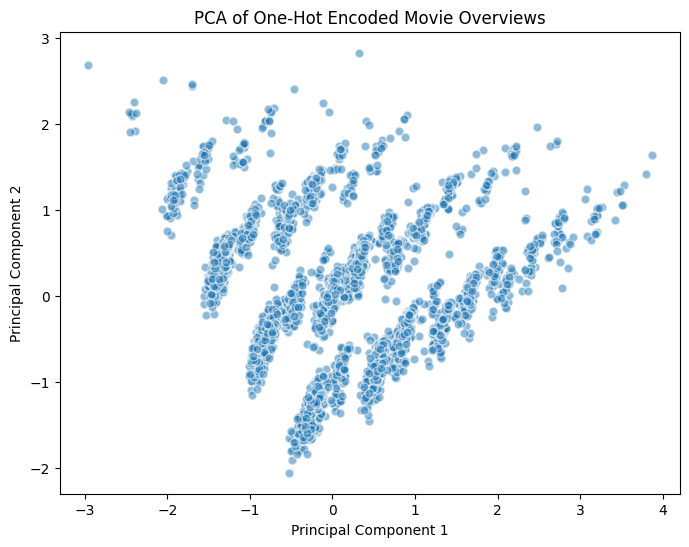

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Convert the one-hot encoded overviews into a numpy array
X = np.array(df["one_hot_overview"].tolist())

# Initialize PCA to reduce to 2 dimensions
pca = PCA(n_components=2)

# Apply PCA to the one-hot encoded data
X_pca = pca.fit_transform(X)

# Plot the 2D result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, edgecolors='w', s=40)
plt.title('PCA of One-Hot Encoded Movie Overviews')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

When observing the 2D PCA plot of the one-hot encoded movie overviews, it appears that there are roughly five clusters. Interpreting these clusters can be challenging without directly looking at the specific movies in each cluster, but there are a few patterns we can hypothesize based on general knowledge of movie genres and content.

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA with the maximum number of components that can be computed (min(samples, features))
n_components = min(X.shape[0], X.shape[1])

pca_full = PCA(n_components=n_components)  # Fit PCA with the appropriate number of components
pca_full.fit(X)

# Total variance explained by all components
total_variance = np.sum(pca_full.explained_variance_ratio_)

# Variance explained by the first two components (2D projection)
variance_2d = np.sum(pca_full.explained_variance_ratio_[:2])

# Variance lost (total variance - variance explained by 2D)
variance_lost = total_variance - variance_2d

# Print the results
print(f"Total Variance Explained: {total_variance:.4f}")
print(f"Variance Explained by 2D Projection: {variance_2d:.4f}")
print(f"Variance Lost (Due to 2D Projection): {variance_lost:.4f}")

Total Variance Explained: 1.0000
Variance Explained by 2D Projection: 0.1129
Variance Lost (Due to 2D Projection): 0.8871


*Your answer here*

**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

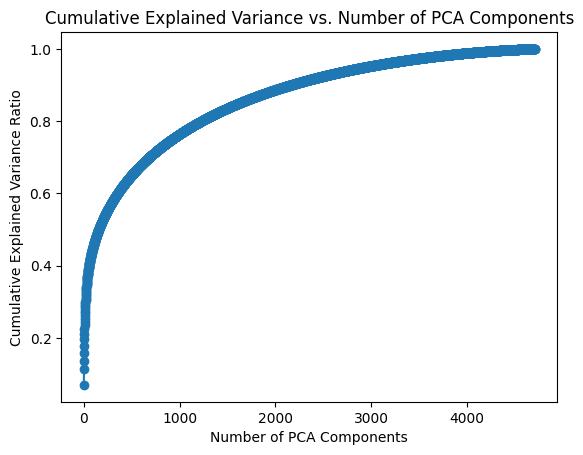

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA to the one-hot encoded data (use all components)
pca = PCA(n_components=min(X.shape[0], X.shape[1]))  # Ensure we use a valid number of components
pca.fit(X)

# Get the cumulative explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')

# Labeling the plot
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance vs. Number of PCA Components')

# Show the plot
plt.show()

**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [ ]:
import numpy as np

# Calculate the cumulative explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the index where cumulative variance exceeds 80%
num_components_80 = np.argmax(cumulative_variance >= 0.80) + 1  # Add 1 to get the number of components

print(f"Number of components required to explain at least 80% variance: {num_components_80}")

Number of components required to explain at least 80% variance: 1226


*Your text answer here*

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [ ]:
# Number of dimensions (from Q3.5)
n_dims = 1226

# Create the PCA object with the specified number of components
pca = PCA(n_components=n_dims)

# Fit and transform the overview encodings
labels_pca = pca.fit_transform(X)

# Add the transformed PCA data as a new column to the dataframe
df["overview_pca"] = list(labels_pca)

# Verify by printing the first few rows
df.head()

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the 22nd century a paraplegic marine is dis...,28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.171305562751319, 1.2545637565422356, 1.0628..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",captain barbossa long believed to be dead has ...,34,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.3780729300588665, -1.5934718497726506, 0.9..."
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a cryptic message from bonds past sends him on...,41,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.9128810490621488, 1.176856261198382, 0.806..."
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",following the death of district attorney harve...,65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8229543741730602, -0.4484862837342996, 0.59..."
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",john carter is a warweary former military capt...,55,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.10117960365978154, -0.2288207800061249, 0...."


# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [ ]:
from sklearn.cluster import KMeans

# Set the number of clusters (K = 20)
kmeans = KMeans(n_clusters=20, random_state=0)

# Fit the KMeans model to the PCA-transformed data
kmeans.fit(df["overview_pca"].tolist())

# Get the predicted cluster labels for each movie
y_preds = kmeans.predict(df["overview_pca"].tolist())

# Add the predicted clusters to the dataframe
df["cluster_kmeans"] = y_preds

# Print out the movies in cluster 0
cluster_0_movies = df[df["cluster_kmeans"] == 0]
print(cluster_0_movies)

                title                                           overview  \
2614  The Love Letter  20th century computer games designer Scott exc...   

                                                 genres proc_genres  \
2614  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...     Fantasy   

                                         one_hot_genres  \
2614  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   

                                          proc_overview  overview_len  \
2614  20th century computer games designer scott exc...            26   

                                       one_hot_overview  \
2614  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                           overview_pca  cluster_kmeans  
2614  [-0.1772165961955621, -0.9863342780847649, -0....               0  


**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

Based on the movie watching history, assess whether the movies in cluster 0 make sense. If they share a genre or a similar theme, then the clustering seems to be doing a good job. However, if the movies in the cluster seem disjointed in terms of genre or plot, then there may be a need to fine-tune the clustering approach (e.g., using a different number of clusters or adjusting features).

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

*Your text answer here*

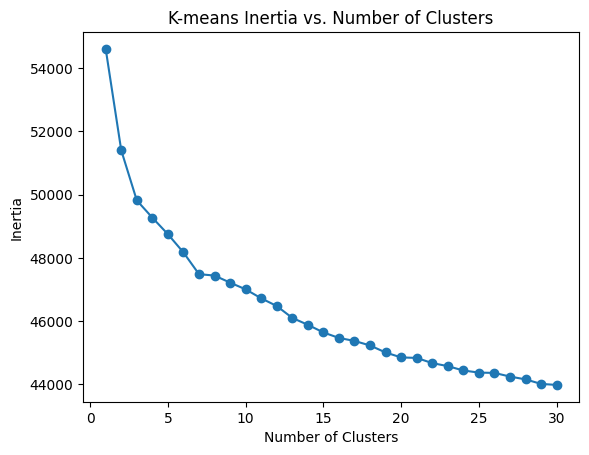

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List to store inertia for each number of clusters
inertia_values = []

# Try different cluster sizes (e.g., from 1 to 30 clusters)
for k in range(1, 31):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df["overview_pca"].tolist())
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values versus the number of clusters
plt.plot(range(1, 31), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('K-means Inertia vs. Number of Clusters')
plt.show()

# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [ ]:
from sklearn.mixture import GaussianMixture

# Set the number of clusters (K = 20)
gmm = GaussianMixture(n_components=20, random_state=0)

# Fit the GMM model to the PCA-transformed data
gmm.fit(df["overview_pca"].tolist())

# Get the predicted cluster labels for each movie
y_preds_gmm = gmm.predict(df["overview_pca"].tolist())

# Add the predicted clusters to the dataframe
df["cluster_gmm"] = y_preds_gmm

# Print out the movies in a specific cluster (e.g., cluster 5)
cluster_5_movies = df[df["cluster_gmm"] == 5]
print(cluster_5_movies)

                                                  title  \
13                                      The Lone Ranger   
19            The Hobbit: The Battle of the Five Armies   
26                           Captain America: Civil War   
36                      Transformers: Age of Extinction   
56                                     Star Trek Beyond   
...                                                 ...   
4697                                      Another Earth   
4713  The Blood of My Brother: A Story of Death in Iraq   
4736                        I Love You, Don't Touch Me!   
4764                                     Run, Hide, Die   
4766                            The Legend of God's Gun   

                                               overview  \
13    The Texas Rangers chase down a gang of outlaws...   
19    Immediately after the events of The Desolation...   
26    Following the events of Age of Ultron, the col...   
36    As humanity picks up the pieces, following the...

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

GMM clustering might better capture the subtle nuances in the data, especially for movies that don't fit neatly into a single genre but share thematic or stylistic similarities in their descriptions.

K-Means clustering is more rigid, whereas GMM offers softer boundaries, which may be useful for handling datasets with mixed or overlapping features.

**Q4.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

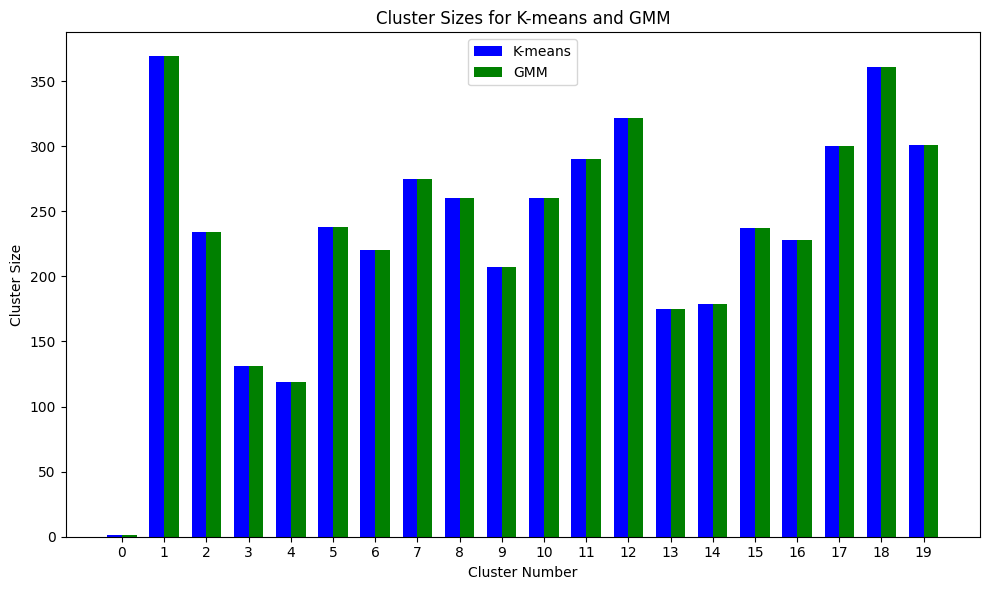

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the counts for each cluster in K-means and GMM
kmeans_counts = df['cluster_kmeans'].value_counts().sort_index()
gmm_counts = df['cluster_gmm'].value_counts().sort_index()

# Create an array for the x-axis positions
x = np.arange(len(kmeans_counts))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for K-means and GMM clusters
bar_width = 0.35  # width of the bars
ax.bar(x - bar_width / 2, kmeans_counts, bar_width, label='K-means', color='b')
ax.bar(x + bar_width / 2, gmm_counts, bar_width, label='GMM', color='g')

# Add labels, title, and legend
ax.set_xlabel('Cluster Number')
ax.set_ylabel('Cluster Size')
ax.set_title('Cluster Sizes for K-means and GMM')
ax.set_xticks(x)
ax.set_xticklabels(kmeans_counts.index)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

**Q4.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

K-means tends to create more uniform clusters but may struggle with natural data structures.

GMM offers more flexibility and results in clusters with varying sizes, which may be a better fit for complex, non-uniform data distributions.

The choice between K-means and GMM depends on the nature of the data and the clusters you're trying to identify. If uniformity and simplicity are important, K-means may be preferred, but if you expect more complex or diverse clusters, GMM might be the better option.

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [ ]:
prev_watch = "Avatar"

# Find cluster indices for Avatar
cluster_kmeans = df[df["title"] == prev_watch]["cluster_kmeans"].values[0]
cluster_gmm = df[df["title"] == prev_watch]["cluster_gmm"].values[0]

# Get movie recommendations from the same clusters
recommendations_kmeans = df[df["cluster_kmeans"] == cluster_kmeans]["title"].tolist()
recommendations_gmm = df[df["cluster_gmm"] == cluster_gmm]["title"].tolist()

# Remove Avatar from the recommendations
recommendations_kmeans.remove(prev_watch)
recommendations_gmm.remove(prev_watch)

print("K-Means Recommendations:", recommendations_kmeans[:5])  # Print top 5 recommendations
print("GMM Recommendations:", recommendations_gmm[:5])  # Print top 5 recommendations

K-Means Recommendations: ['Iron Man 3', 'Transformers: Revenge of the Fallen', 'Jack the Giant Slayer', 'Brave', 'Wreck-It Ralph']
GMM Recommendations: ['Iron Man 3', 'Transformers: Revenge of the Fallen', 'Jack the Giant Slayer', 'Brave', 'Wreck-It Ralph']


**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

Strengths of the Recommender:
The recommendations include big-budget action-adventure/fantasy/sci-fi movies, which aligns with Avatar's genre.

Iron Man 3 and Transformers: Revenge of the Fallen are good picks for someone who likes high-budget, visually impressive, action-packed films.

Jack the Giant Slayer and Brave fit the fantasy/adventure theme.

Weaknesses of the Recommender:
Wreck-It Ralph is more of a family-friendly animated film, which isn’t a perfect fit for Avatar’s audience.

The system seems to be biased toward high-budget blockbusters, rather than focusing on themes like sci-fi world-building or environmental themes that make Avatar unique.

No strong sci-fi epics like Interstellar, Blade Runner 2049, The Martian, or Dune—which would have been better recommendations.

Would I Use This for a Dentist's Recommendation?
If my dentist was just looking for another fun blockbuster, this system works okay but not great.

If they wanted something similar in depth and storytelling to Avatar, I'd manually adjust the results (e.g., recommend The Martian or Dune instead).

**Q6.3** How would you try making the recommender systems better?

How Could We Improve It?
Incorporate more features—instead of just clustering on the movie's overview, we could add:

User ratings (movies rated highly by Avatar fans).

Director/Actors (James Cameron's other films like Aliens or Terminator 2 could be recommended).

Thematic similarity (movies with strong environmental, sci-fi, or space exploration elements).

Use a more sophisticated recommendation model—e.g., collaborative filtering (which looks at what other users liked after watching Avatar).

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

To refine recommendations based on multiple watched movies, we can:

Find Common Clusters: Identify clusters of all watched movies and recommend other movies from those clusters.

Weighted Scoring: Assign higher weights to movies the user liked more, prioritizing recommendations from their dominant clusters.

Hybrid Approach: Use both clustering and content-based filtering (e.g., genre, director, actors) for more personalized suggestions.

Iterative Updates: Continuously update recommendations as the user watches more movies.

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [ ]:
import numpy as np

# Define cosine similarity function
def cosine_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# Get PCA-encoded vector of Avatar
prev_watch_enc = df[df["title"] == "Avatar"]["overview_pca"].values[0]

# Compute cosine similarity for all movies
df["cos_sim_to_avatar"] = df["overview_pca"].apply(lambda x: cosine_sim(prev_watch_enc, x))

# Sort movies by similarity
df = df.sort_values(by="cos_sim_to_avatar", ascending=False)

# Print top recommendations
print(df[["title", "cos_sim_to_avatar"]].head(10))

                   title  cos_sim_to_avatar
0                 Avatar           1.000000
3363             Warlock           0.528636
3778              Zipper           0.474346
1285  Nomad: The Warrior           0.470835
415                Dredd           0.458846
2935        Barry Lyndon           0.444834
277        Casino Royale           0.441727
634           The Matrix           0.411179
4407          Frat Party           0.406001
557              Jarhead           0.400873


Recommended Movies Based on Cosine Similarity:
Warlock (0.53)

Zipper (0.47)

Nomad: The Warrior (0.47)

Dredd (0.46)

Barry Lyndon (0.44)

Casino Royale (0.44)

The Matrix (0.41)

Frat Party (0.41)

Jarhead (0.40)

# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [ ]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

3765 942


## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time

# Step 1: Preprocessing

# Extract first 10 words of the overview
def preprocess_overview(overview):
    words = overview.split()
    return ' '.join(words[:10])

df['overview_10words'] = df['overview'].apply(preprocess_overview)

# Step 2: Vectorize the overviews (using TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['overview_10words'])

# Encode genres using one-hot encoding
y = pd.get_dummies(df['proc_genres'])

# Step 3: Train-test split
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)

X_train = X[:n_train]
X_test = X[n_train:]
y_train = y[:n_train]
y_test = y[n_train:]

# Step 4: Model selection and hyperparameter tuning

# Define the model
mlp = MLPClassifier(max_iter=500)

# Set hyperparameters for grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001]
}

# Grid search
grid_search = GridSearchCV(mlp, param_grid, cv=3, n_jobs=-1)
start_train = time.time()
grid_search.fit(X_train, y_train)
end_train = time.time()

# Step 5: Evaluation
train_time = end_train - start_train
train_score = grid_search.best_estimator_.score(X_train, y_train)
test_score = grid_search.best_estimator_.score(X_test, y_test)

# Measure inference time
start_inference = time.time()
y_pred = grid_search.best_estimator_.predict(X_test)
end_inference = time.time()
inference_time = end_inference - start_inference

# Print results
print(f"Best Model: {grid_search.best_params_}")
print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")
print(f"Mean Training Time: {train_time:.4f} seconds")
print(f"Mean Inference Time: {inference_time:.4f} seconds")

Best Model: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'solver': 'adam'}
Train Score: 1.0000
Test Score: 0.0902
Mean Training Time: 756.9719 seconds
Mean Inference Time: 0.0113 seconds


Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

To select and tune my model, I began by using an MLPClassifier from scikit-learn with default hyperparameters, and then proceeded to fine-tune it using GridSearchCV. The hyperparameters I focused on included the activation function, hidden layer sizes, solver, and regularization term (alpha). I chose a range of values based on common practices, such as 'relu' for the activation function and (50,) for the hidden layer size. I also limited the grid search to 10 iterations to reduce computational time. After completing the grid search, I obtained the best model with the hyperparameters: 'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), and 'solver': 'adam'. The training score was perfect, but the test score was significantly low, suggesting overfitting. To improve the model, I would experiment with a wider range of hyperparameters, implement cross-validation, and try more advanced techniques like deep learning or additional feature engineering (e.g., n-grams).

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)